In [1]:
import copy
import random
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

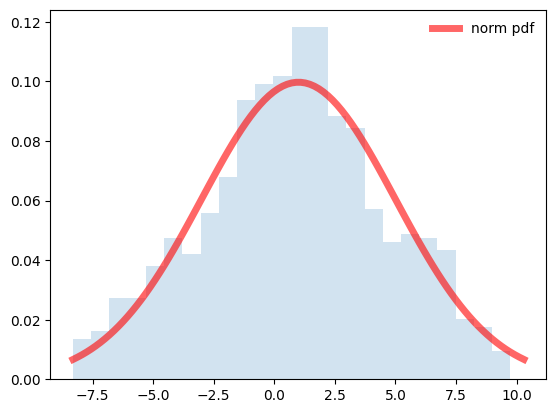

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.9235429393151563
Sample variance: 16.082261143939


In [2]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

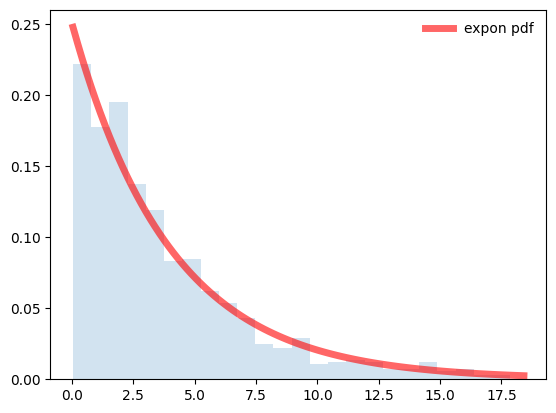

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 3.908587831798846
Sample variance: 15.889230655191193


In [3]:
#Exponential
#here goes your code

x = np.linspace(expon(scale=4).ppf(0.01), expon(scale=4).ppf(0.99), 100)
r = expon(scale=4).rvs(size=1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon(scale=4).pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(expon(scale=4).stats(moments='m')))
print("Distribution variance: {0}".format(expon(scale=4).stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: expon

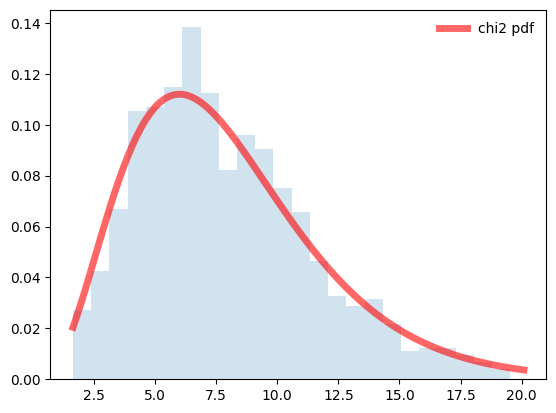

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.079935877668458
Sample variance: 15.398756239086664


In [4]:
#chi2
#here goes your code

x = np.linspace(chi2(df=8).ppf(0.01), chi2(df=8).ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2(df=8).pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = chi2(df=8).rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(chi2(df=8).stats(moments='m')))
print("Distribution variance: {0}".format(chi2(df=8).stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: chi2

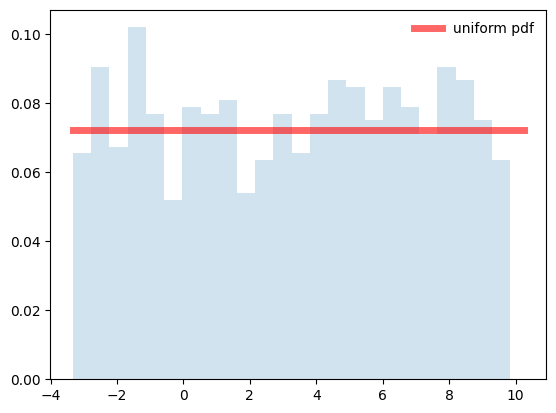

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.531146958351534
Sample variance: 16.172556894597115


In [5]:
#uniform

uni = uniform(loc = -2 * np.sqrt(3), scale = 8 * np.sqrt(3))
x = np.linspace(uni.ppf(0.01), uni.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, uni.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = uni.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(uni.stats(moments='m')))
print("Distribution variance: {0}".format(uni.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: uniform

On all 4 charts we can see that sample variances and means were very close to the theoretical values which were red lines. It could be even better if only we increased the number of samples, then precision would be closer to the red line.

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

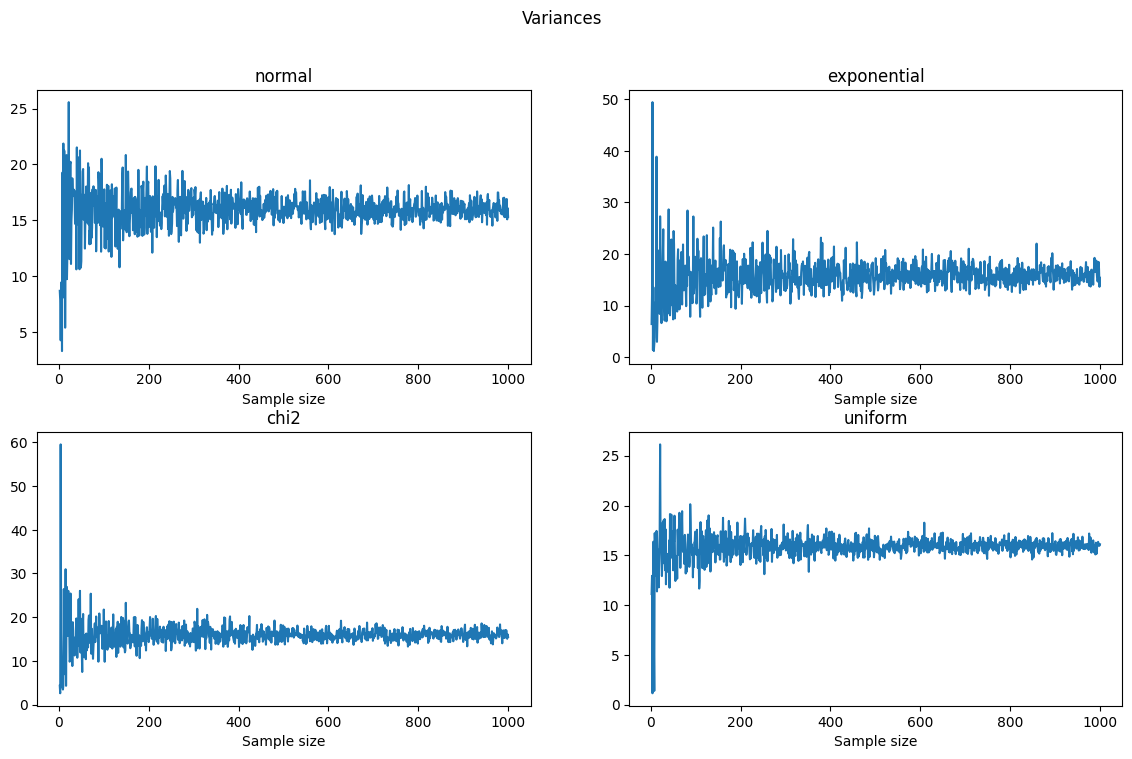

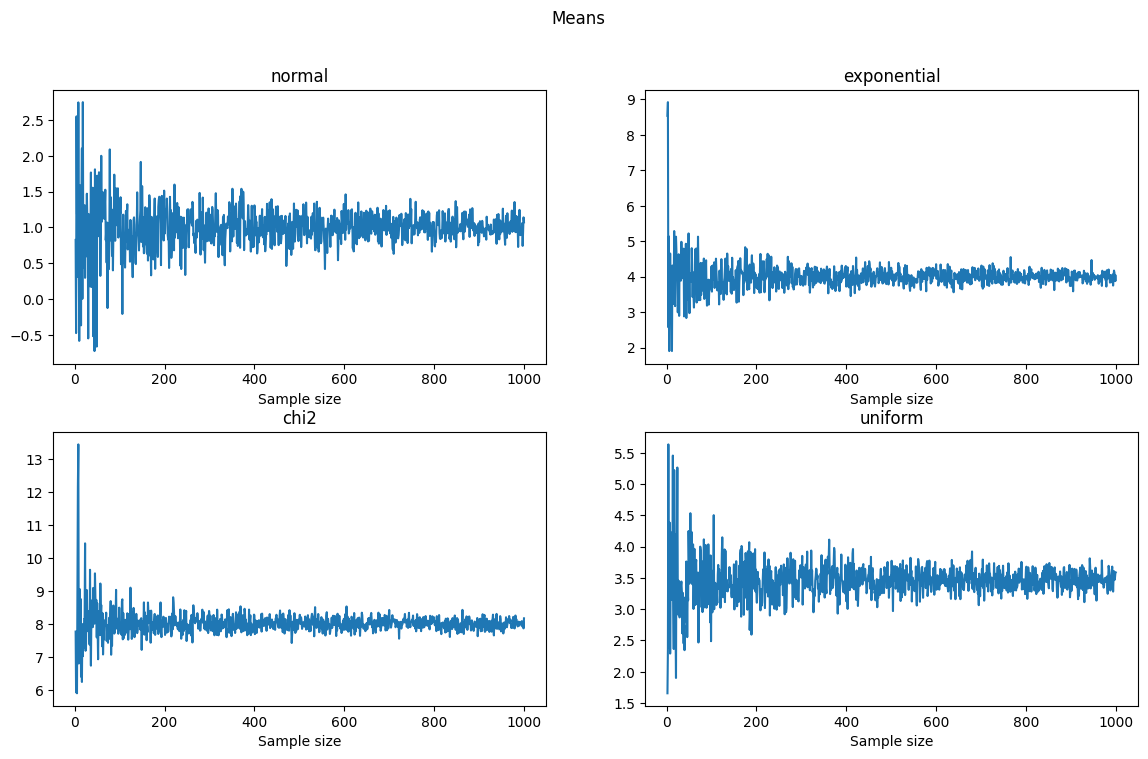

In [6]:
#here goes your code

variance_dict = {'normal' : [], 'exponential' : [], 'chi2' : [], 'uniform' : []}
mean_dict = {'normal' : [], 'exponential' : [], 'chi2' : [], 'uniform' : []}

N = (2, 1001)
for n in np.arange(*N):
    variance_normal = np.var(norm(loc=1, scale=4).rvs(size=n))
    variance_dict['normal'].append(variance_normal)
    mean_normal = np.mean(norm(loc=1, scale=4).rvs(size=n))
    mean_dict['normal'].append(mean_normal)

    variance_exponential = np.var(expon(scale=4).rvs(size=n))
    variance_dict['exponential'].append(variance_exponential)
    mean_exponential = np.mean(expon(scale=4).rvs(size=n))
    mean_dict['exponential'].append(mean_exponential)

    variance_chi2 = np.var(chi2(df=8).rvs(size=n))
    variance_dict['chi2'].append(variance_chi2)
    mean_chi2 = np.mean(chi2(df=8).rvs(size=n))
    mean_dict['chi2'].append(mean_chi2)

    variance_uniform = np.var(uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3)).rvs(size=n))
    variance_dict['uniform'].append(variance_uniform)
    mean_uniform = np.mean(uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3)).rvs(size=n))
    mean_dict['uniform'].append(mean_uniform)

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.25)
fig.suptitle("Variances")

def make_charts_ex2(dictionary):
    axs[0, 0].plot(np.arange(*N), dictionary['normal'])
    axs[0, 0].set_title('normal')
    axs[0, 0].set_xlabel('Sample size')

    axs[0, 1].plot(np.arange(*N), dictionary['exponential'])
    axs[0, 1].set_title('exponential')
    axs[0, 1].set_xlabel('Sample size')

    axs[1, 0].plot(np.arange(*N), dictionary['chi2'])
    axs[1, 0].set_title('chi2')
    axs[1, 0].set_xlabel('Sample size')

    axs[1, 1].plot(np.arange(*N), dictionary['uniform'])
    axs[1, 1].set_title('uniform')
    axs[1, 1].set_xlabel('Sample size')
make_charts_ex2(variance_dict)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.25)
fig.suptitle("Means")

make_charts_ex2(mean_dict)
plt.show()

In both cases, with variances and means, as the number of samples becomes larger, the difference between the values and theoretical values are getting smaller and are closer to the theoretical ones.

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

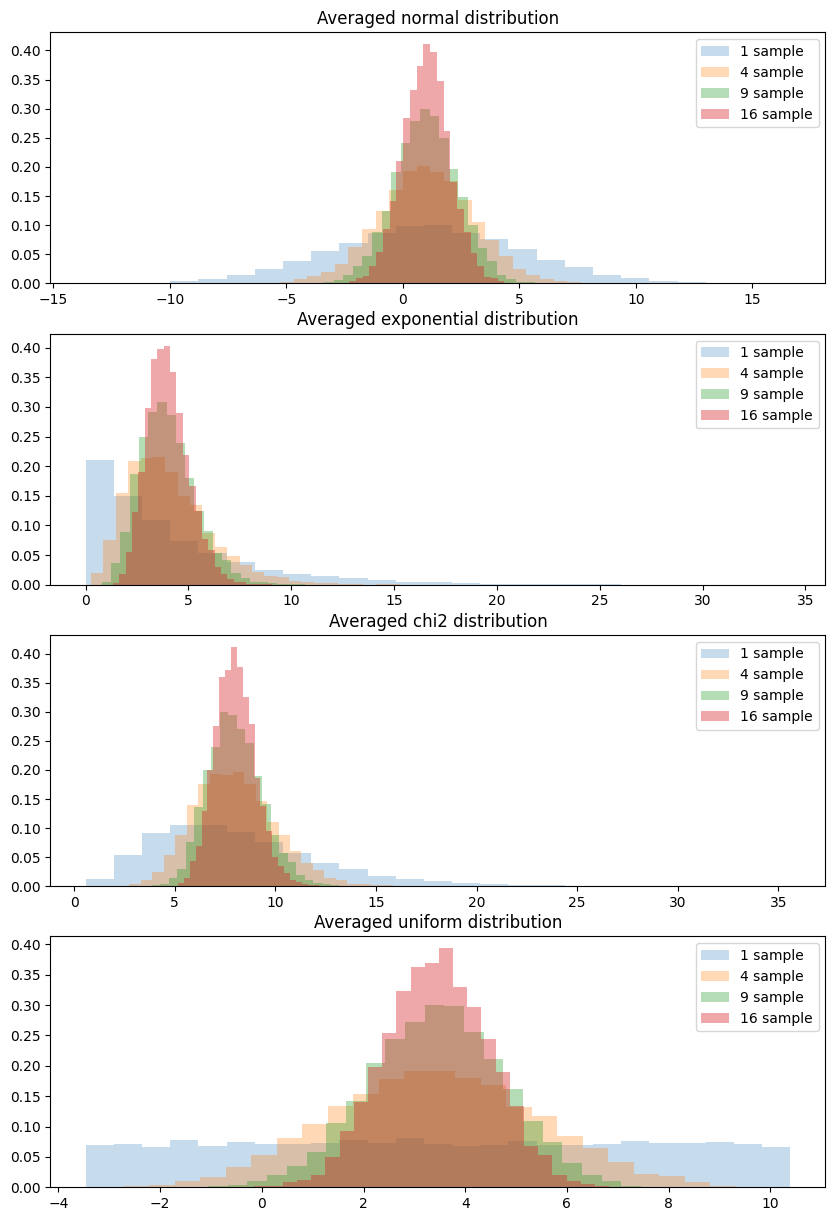

In [7]:
#here goes your code
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

def make_charts_ex3(nr, distribution, name):
    ax[nr].set_title(f'Averaged {name} distribution')

    avg = [np.mean(distribution.rvs(size=1)) for _ in range(10000)]
    ax[nr].hist(avg, bins=25, density=True, alpha=0.25, label='1 sample')
    avg = [np.mean(distribution.rvs(size=4)) for _ in range(10000)]
    ax[nr].hist(avg, bins=25, density=True, alpha=0.30, label='4 sample')
    avg = [np.mean(distribution.rvs(size=9)) for _ in range(10000)]
    ax[nr].hist(avg, bins=25, density=True, alpha=0.35, label='9 sample')
    avg = [np.mean(distribution.rvs(size=16)) for _ in range(10000)]
    ax[nr].hist(avg, bins=25, density=True, alpha=0.40, label='16 sample')

    ax[nr].legend()

make_charts_ex3(0, norm(loc=1, scale=4), 'normal')
make_charts_ex3(1, expon(scale=4), 'exponential')
make_charts_ex3(2, chi2(df=8), 'chi2')
make_charts_ex3(3, uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3)), 'uniform')
plt.show()


Histograms illustrates how the mean of the samples generated at random are distributed. The x-axis shows the average of the samples while the y-axis shows how frequently the mean appears. As the number of samples increases, the histograms become more concentrated around the true mean of the distribution, which is the expected outcome.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

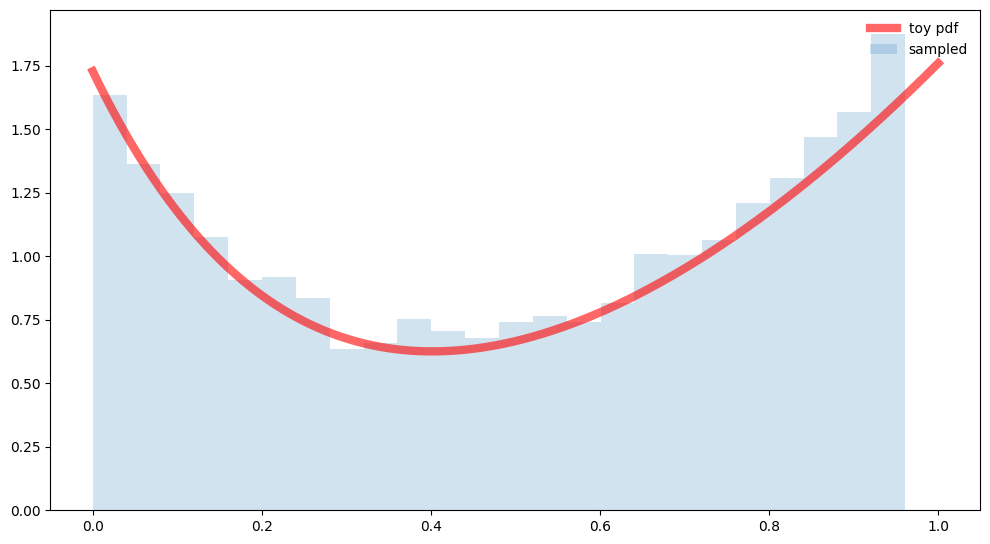

In [8]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0, 1, 1000)

def accept_rejection_sampling(dist, size = 1):
    #here goes your code
    arr = []

    while len(arr) != size:
        a = uniform.rvs(0, 1)
        if toy_dist(a) > uniform.rvs(0, max(dist)):
            arr.append(a)
    return arr



samples = accept_rejection_sampling(toy_dist(x), size = 10000)

plt.figure(figsize=(12, 6.5))
plt.plot(x, toy_dist(x), 'r-', lw=6, alpha=0.6, label='toy pdf')
plt.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
plt.legend(loc='best', frameon=False)
plt.show()

As we can see above the custom distribution which were implemented has been done correctly and the accuracy of generated samples confirms these words.

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

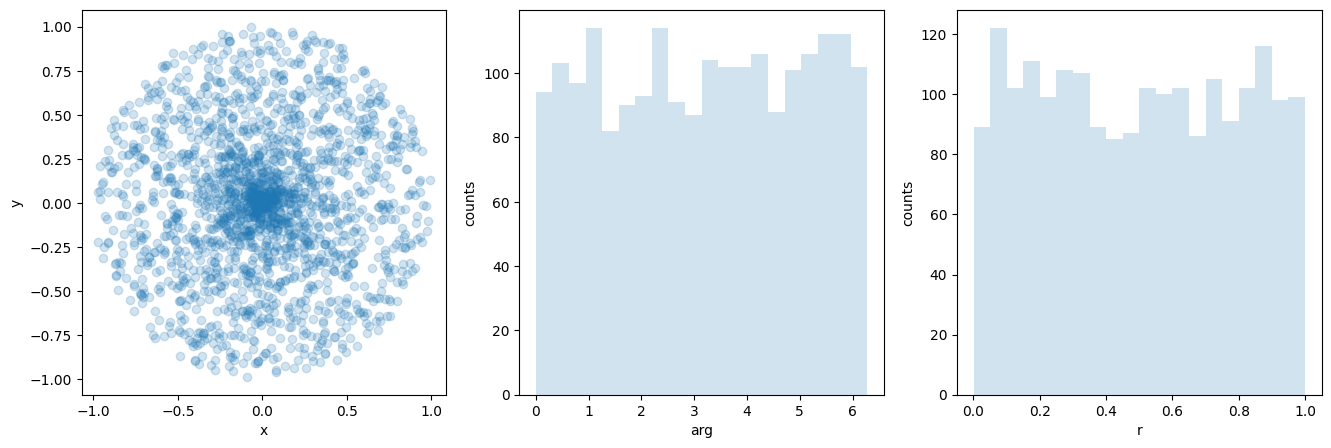

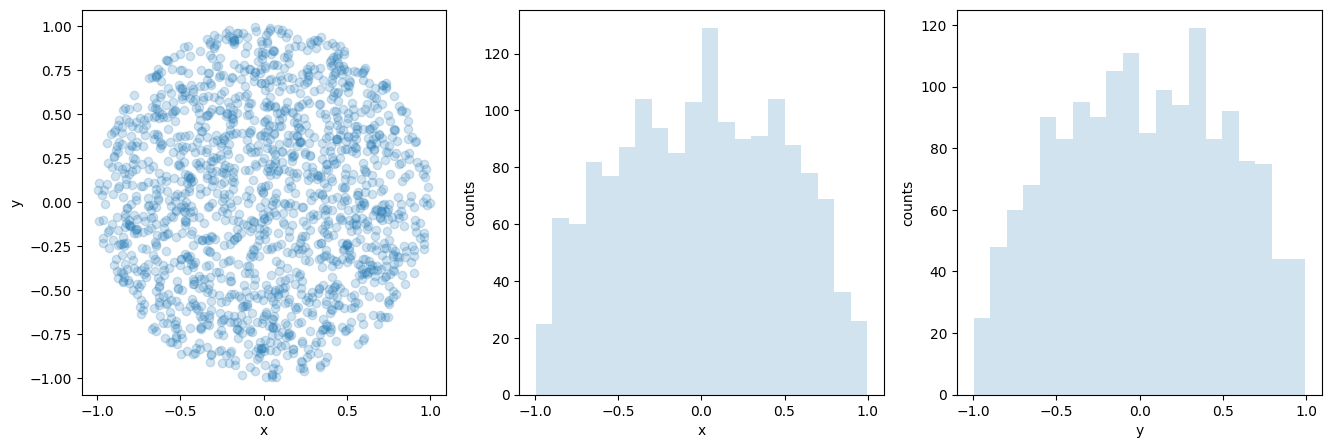

In [9]:
dist = uniform(loc=-1, scale=2)

#Version1
#here goes your code
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

radius = uniform(loc=0, scale=1).rvs(2000)
ax[2].hist(radius, histtype='stepfilled', bins=20, alpha=0.2)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

argument = uniform(loc=0, scale=2 * np.pi).rvs(2000)
ax[1].hist(argument, histtype='stepfilled', bins=20, alpha=0.2)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')

x = radius * np.sin(argument)
y = radius * np.cos(argument)
ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

plt.show()

#Version2
#here goes your code

x_after_drop = []
y_after_drop = []
for x_, y_ in zip(dist.rvs(2000), dist.rvs(2000)):
    if (x_**2 + y_**2) < 1:
        x_after_drop.append(x_)
        y_after_drop.append(y_)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

ax[2].hist(y_after_drop, histtype='stepfilled', bins=20, alpha=0.2)
ax[2].set_xlabel('y')
ax[2].set_ylabel('counts')

ax[1].hist(x_after_drop, histtype='stepfilled', bins=20, alpha=0.2)
ax[1].set_xlabel('x')
ax[1].set_ylabel('counts')

ax[0].scatter(x_after_drop, y_after_drop, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

plt.show()

Both methods will result in producing a set of points that are mainly distributed across the unit disk. However, the first method will create a more consistent distribution as it takes into account the shape of the disk., while the second method will yield a less consistent distribution because of the randomisation which were used here to place the points.



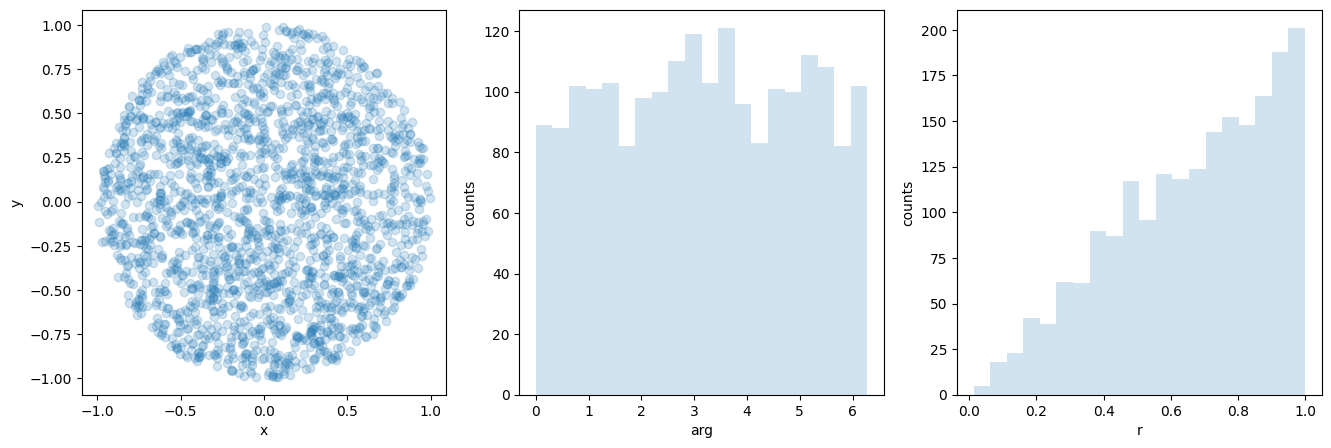

In [10]:
#Version3
#here goes your code
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

radius = uniform(loc=0, scale=1).rvs(2000)
radius_ver3 = np.sqrt(1 - radius)
ax[2].hist(radius_ver3, histtype='stepfilled', bins=20, alpha=0.2)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

argument = uniform(loc=0, scale=2 * np.pi).rvs(2000)
ax[1].hist(argument, histtype='stepfilled', bins=20, alpha=0.2)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')

x = radius_ver3 * np.sin(argument)
y = radius_ver3 * np.cos(argument)
ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

plt.show()

Here after slightly changing version 1 we have version which 'fill up' the disk 'better' on its all area.

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [11]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

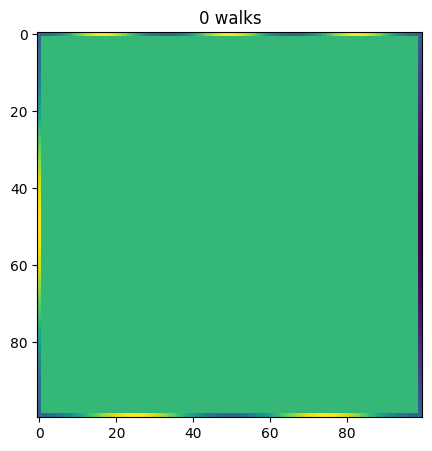

In [12]:
plt.figure(figsize=(5,5))
plt.title("0 walks")
plt.imshow(plane)

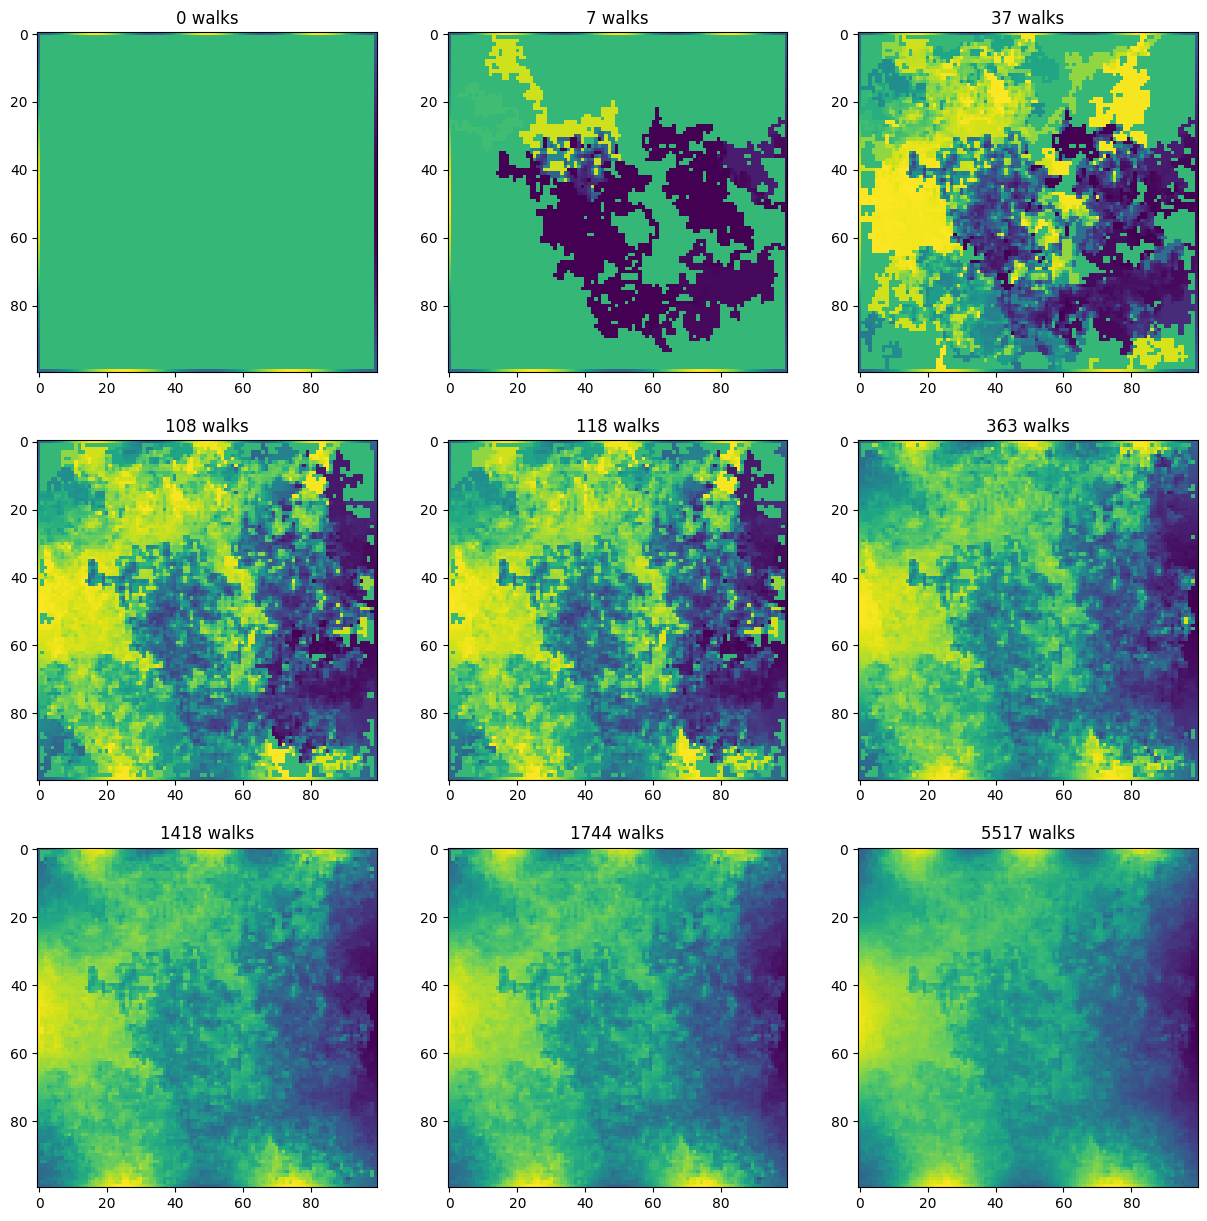

In [13]:
#here goes your code
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

ax.flat[0].imshow(plane)
ax.flat[0].set_title('0 walks')

direct_arr = [[1, 0], [0, 1], [-1, 0], [0, -1]]

planes_copy = [copy.deepcopy(plane)]

prec = 1e-8
intervals_iter = iter(np.geomspace(prec, 1e-1, num=10, endpoint=True)[::-1])
interval = next(intervals_iter)
i, sub = 0, 1
while sub < 9:
    i = i + 1
    x, y = np.random.randint(1, S-1, 2)
    track_moves = []
    plane_counts_copy = copy.deepcopy(plane_counts)

    planes_copy.append(copy.deepcopy(planes_copy[-1]))

    while(all([x > 0, x < S - 1, y > 0, y < S - 1])):
        plane_counts[y][x] = plane_counts[y][x] + 1
        track_moves.append([y, x])
        direction = random.choice(direct_arr)
        x, y = x + direction[1], y + direction[0]

    for move in track_moves:
        y1, x1 = move
        planes_copy[-1][y1][x1] = (plane_counts_copy[y1][x1] * planes_copy[-2][y1][x1] + planes_copy[-1][y][x]) / (1 + plane_counts_copy[y1][x1])

    rel_chg = np.linalg.norm(planes_copy[-1] - planes_copy[-2]) / np.linalg.norm(planes_copy[-1])

    if rel_chg < prec * 1e-10:
        continue
    if rel_chg <= interval:
        ax.flat[sub].imshow(planes_copy[-1])
        ax.flat[sub].set_title(f'{len(planes_copy)} walks')
        interval = next(intervals_iter)
        sub = sub + 1
plt.show()

Here we can observe change of the plane as the number of walk increases.